In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

In [279]:
df=pd.read_csv("../Dataset/kidney_disease.csv")

# Exploring Dataset

In [280]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [281]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [282]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [283]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [286]:
# find unique values of each feature
for col in df:
    unique=df[col].value_counts()
    print(unique,"\n========================= \n")

id
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: count, Length: 400, dtype: int64 

age
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64 

bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64 

sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64 

al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64 

su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64 

rbc
normal      201
abnormal     47
Name: count, dtype: int64 

pc
normal      259
abnormal     76
Name: count, dtype: int64 

pcc
notpresent    354
present        42
Name: count, dtype: int64 

ba
notpresent    374
present        22
Name: c

# Identifying Activities        
<!--  -->          
Based on our dataset understanding stage, we can identify some activiteis that needs to be done on the dataset.            

* 1.**Removing unwanted columns:** The dataset might have some features that are unnecessary for our modelling.that is features that cannot be used as predictor removes before the EDA                    
<!--  -->              
              
              
* 2.**Cleaning Data:** some features have special character.so remove them before handling Nan Values    
<!--  -->       
                
                

* 3.**Handling Missing/Nan values:** Make sure that dataset doesn't have anay missing/Nan values              
<!--  -->              
                      
                      
* 4.**Exploratory Data Analysis:** explore the feature statistically and use visualization to get view of the data        
<!--  -->                     
                

* 5.**Handle Categorical Data:** categorical data need to be encoded before modelling     
<!--  -->                    
                       
                       
* 6.**Handle Numeric Data:** Numeric data need to be standardization or Normalization

# EDA & Visualization     
<!--  -->        


### Remove unwanted columns      
<!--  -->      
We need to remove features that cannot be used or modelling.The ID feature contains unique id for every patient so it can not be used as Predictor(input) fot the Target(output),and should be dropped

In [287]:
# remove "id" feature 
df.drop('id',axis=1,inplace=True)

### Cleaning the Data values    
<!--  -->       
in our dataset some features **['pcv','wc','rc','dm','cad','classification']** contains some special character.so replace them with appropriate values.

In [288]:
# cleaning 'PCV'
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

**Note:** Some features are mistyped as "object".so convert them into "float" type

In [289]:
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')

In [290]:
#  define categoricsl features
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [291]:
# define numeric features
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

### Handling Nan Values

In [292]:
# Checking missing/Nan values
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Conclusion:** We have Nan values in every feature, except in Target feature

In [293]:
# Let's impute Nan Values with median in numeric features
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [294]:
# let's impute categorical features with most frequent value
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [295]:
df.isna().sum().sort_values(ascending=False)

age               0
pot               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
sod               0
bp                0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
classification    0
dtype: int64

### Target Feature Exploration

In [296]:
# Encode classification
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

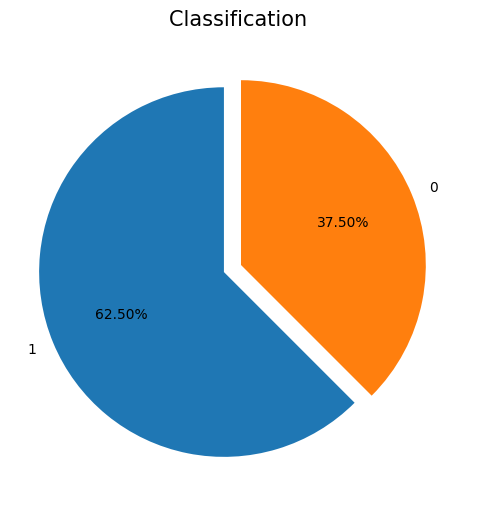

In [297]:
attr_count=df['classification'].value_counts()
attr_label=df['classification'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

### Distribution

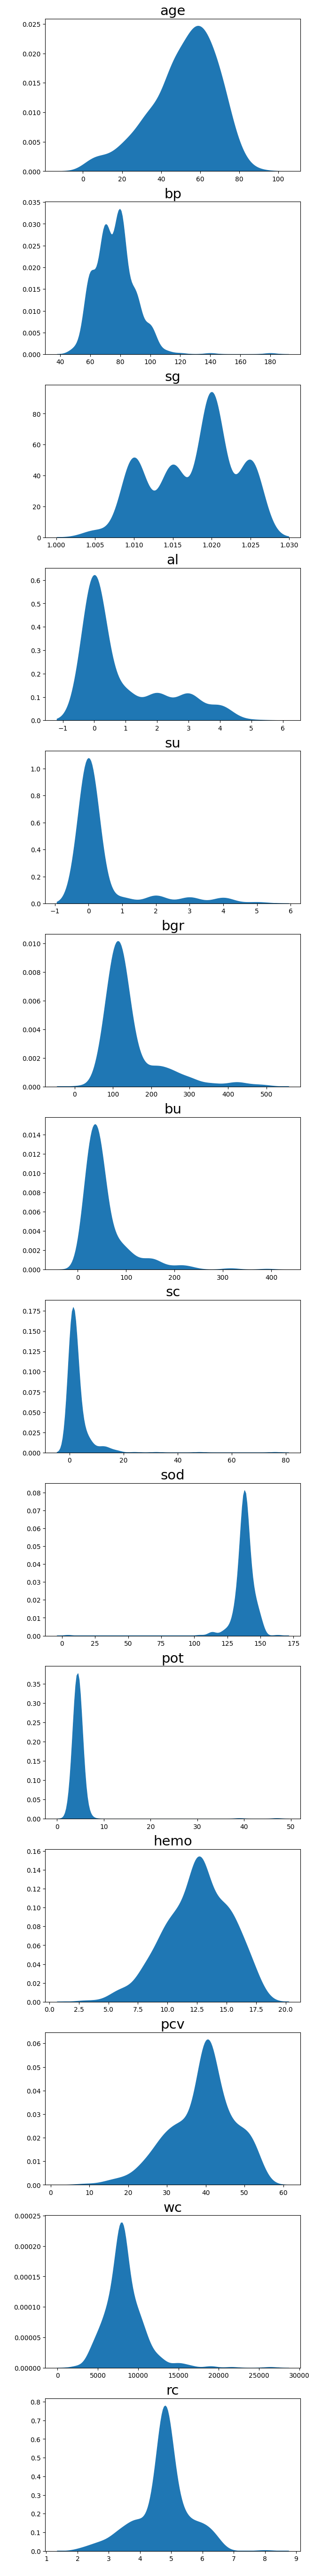

In [298]:
fig,ax=plt.subplots(figsize=(7,70),ncols=1,nrows=14)

i=0
for col in num_cols:
    sns.kdeplot(x=df[col],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col,fontsize=21)
    i=i+1
plt.show()

In [299]:
# check skewness of the distribution 
skew=[]
for col in num_cols:
    skew.append(round(df[col].skew(),3))
num_dist=pd.DataFrame({'features':num_cols,'skewness':skew})
num_dist

,features,skewness
0,age,-0.689
1,bp,1.602
2,sg,-0.333
3,al,1.180
4,su,2.700
5,bgr,2.204
6,bu,2.724
7,sc,7.666
8,sod,-7.929
9,pot,13.133


Features that have skewness between **-0.05 and 0.005** are assumed to be **Gaussian Normal Distribution**, but we do not find any feature which has normal distribution 

### Numerical Relationship

Here we can see that some features are highly correlated,such as:

hemo and pcv(0.85)       
<!--  -->                

We only need one of them and we can safely drop the other.we choose to drop one feature the have higher correlation to target variable.that is pcv (-0.67 vs -0.73)


In [300]:
df.drop('pcv',axis=1,inplace=True)
num_cols.remove('pcv')

### Target Relationship 

In [301]:
tg_num_corr=[]

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['classification']))
    
# create as DataFrame
tg_num_df=pd.DataFrame({'numerical_predictor':num_cols,'correlation_w_target':tg_num_corr})

# sort the DataFrmae by the absolute vaue of their correlation coefficient,descending
tg_num_df=tg_num_df.sort_values(by='correlation_w_target',ascending=False).reset_index(drop=True)

tg_num_df

,numerical_predictor,correlation_w_target
0,al,0.531562
1,bgr,0.379321
2,bu,0.369393
3,su,0.294555
4,bp,0.293693
5,sc,0.291245
6,age,0.227842
7,wc,0.177571
8,pot,0.065218
9,sod,-0.334900


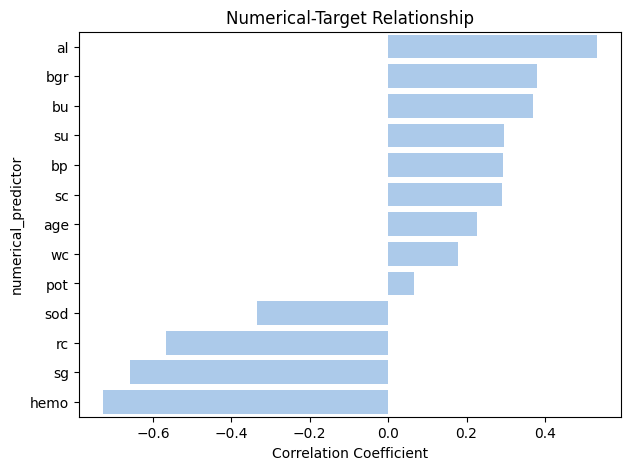

In [302]:
# display as figure
plt.figure(figsize=(7,5))
sns.barplot(x=tg_num_df['correlation_w_target'],y=tg_num_df['numerical_predictor'],color='#a2c9f4')
plt.xlabel('Correlation Coefficient')
plt.title('Numerical-Target Relationship',fontsize=12)
plt.show()

### Outlier Detection

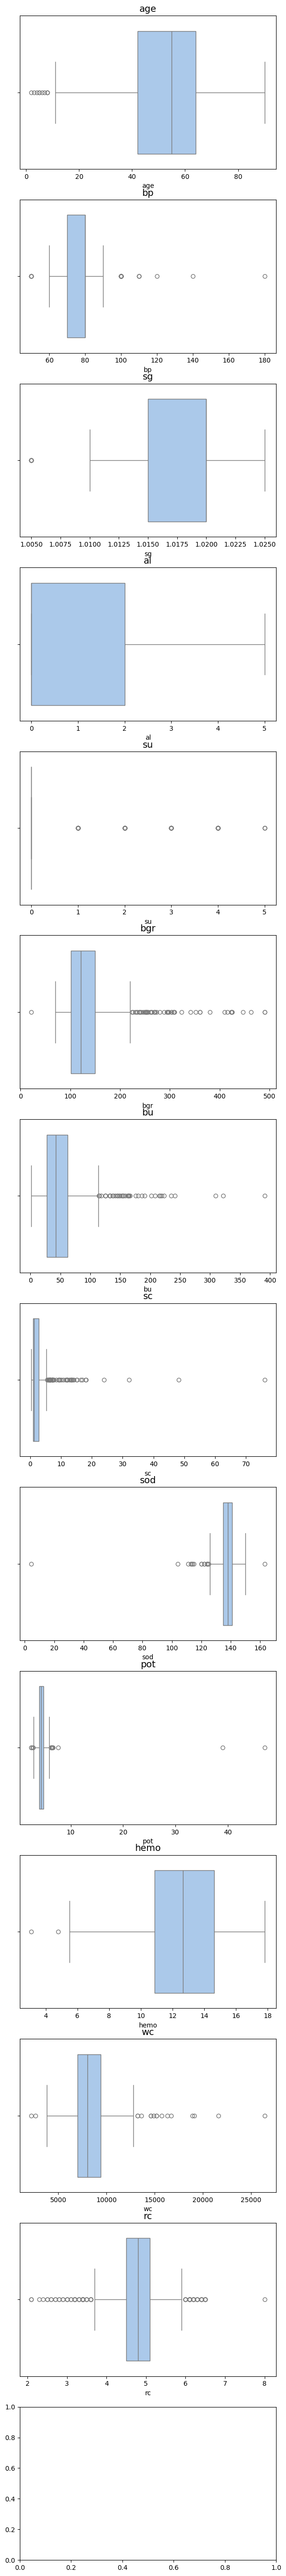

In [303]:
# set the figure
fig,ax=plt.subplots(ncols=1,nrows=14,figsize=(7,70))
i=0
for col in num_cols:
    sns.boxplot(data=df,x=col,ax=ax[i],palette='pastel')
    ax[i].set_title(col,fontsize=14)
    i=i+1
    
plt.show()

Here, we are not removing outliers.because we have small dataset

### Encoding

In [304]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

### Scaling            
<!--  -->         
The technique used to scale the numerical data depends on the type of its distribution           
<!--  -->        
              
#### Standardization         
<!--  -->          
standardization is used to sclae feature that are assumed to have Gaussian distribution (skewness between -0.05 and 0.05)      
<!--  -->           
             
#### Normalization           
<!--  -->
if that does not have a gaussian distribution,use Normalization

In [305]:
# scaling with MinMaxScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler           
mm_scaler=MinMaxScaler()
df[num_cols]=mm_scaler.fit_transform(df[num_cols])

# Model Building 

In [306]:
from sklearn.model_selection import train_test_split
x=df.drop('classification',axis=1)
y=df['classification']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 23) , X_test size (80, 23)


In [307]:
# Using GridSearchCV we find the best algorithm to this problem
from sklearn.model_selection import ShuffleSplit,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [308]:
# Crete a function to find the best algo. for this problem
def find_best_model(x,y):
    models={'Logistic_regression':{'model':LogisticRegression(solver='liblinear',penalty='l2',multi_class='auto'),'parameter':{'C':[1,4,8]}},
           'decision_tree':{'model':DecisionTreeClassifier(splitter='best'),'parameter':{'criterion':['gini','entropy'],'max_depth':[5,7,13,15]}},
           'svm':{'model':SVC(gamma='auto'),'parameter':{'kernel':['sigmoid','linear'],'C':[1,5,10,15]}},
           'random_forest':{'model':RandomForestClassifier(criterion='gini'),'parameter':{'max_depth':[5,10,15],'n_estimators':[1,3,5]}}}
    scores=[]
    cv_shuffle=StratifiedKFold(n_splits=10)
    
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameter'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        scores.append({'model':model_name,'best_parameters':gs.best_params_,'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])
find_best_model(X_train,y_train)

,model,best_parameters,score
0,Logistic_regression,{'C': 4},0.975000
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.975000
2,svm,"{'C': 5, 'kernel': 'linear'}",0.978125
3,random_forest,"{'max_depth': 10, 'n_estimators': 3}",0.981250


**Note:** since the RandomForest Classifier has the highest accuracy, we furthur fine tune the model using hyperparameter optimization

In [309]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestClassifier(max_depth=15,n_estimators=5),X_train,y_train,cv=10)
print("Average Accuracy Score {}".format(score.mean()))

Average Accuracy Score 0.978125


In [310]:
# Creating Random Forest model
rf=RandomForestClassifier(max_depth=5,n_estimators=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

# Model Evaluation

In [311]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=rf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[28,  0],
       [ 0, 52]], dtype=int64)

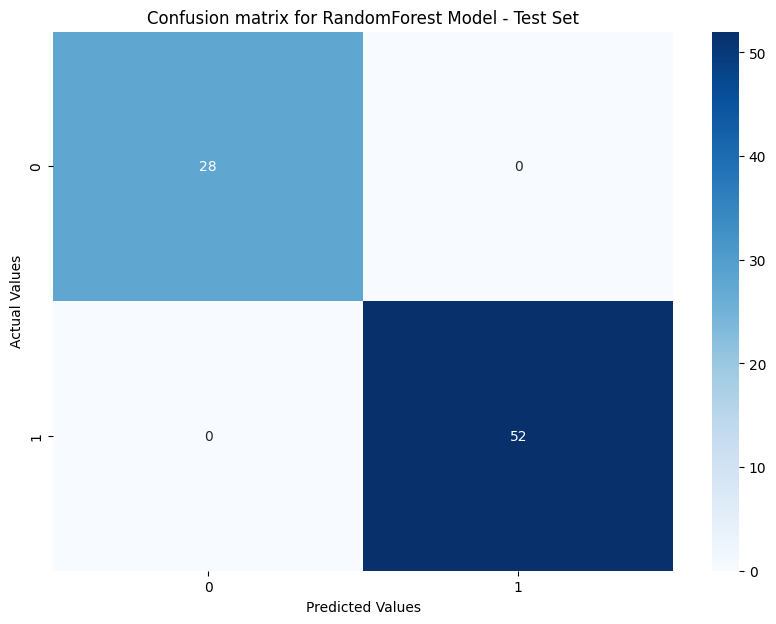

In [312]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for RandomForest Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [313]:
# Accuracy score
score=round(accuracy_score(y_test,y_pred),3)
print("Accuracy on the Test set: {}".format(score))

Accuracy on the Test set: 1.0


In [314]:
# Classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [315]:
# Creating a confusion matrix for training set
y_train_pred=rf.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[122,   0],
       [  2, 196]], dtype=int64)

In [316]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Accuracy on training set: {}".format(score))

Accuracy on training set: 0.994


In [317]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.99      0.99       198

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [318]:
joblib.dump(rf,'../Models/rfc_model.pkl')

['../Models/rfc_model.pkl']

## Feature Selection

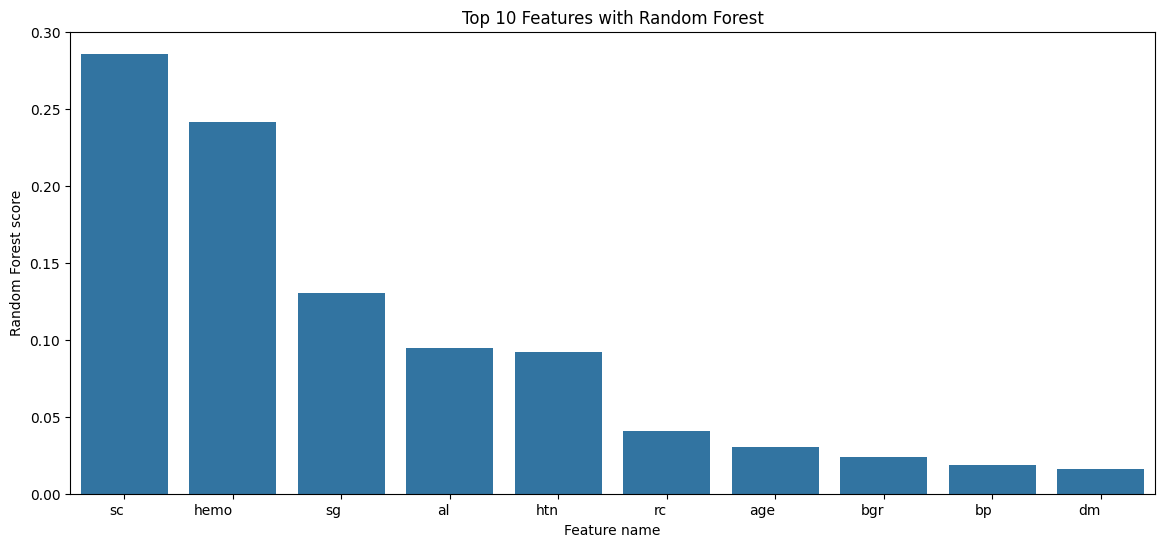

In [319]:
# Top 10 Features
feature_scores=pd.DataFrame(rf.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(14,6))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

# Prediction

In [320]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
rf.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)
    
    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return rf.predict(x)

In [321]:
# Prediction 1
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc), 
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [322]:
# Prediction 2
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc), 
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(27.4,4.2,0.19,1,7.0,0,90.6,37,30949,26)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [323]:
# Prediction 3
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc), 
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(17.4,2.2,0.89,0,12.0,0,50.6,87,949,19)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.
